In [153]:
# Import các thư viện và module cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [154]:
# Kết nối với Google Drive
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# Mô tả các cột dữ liệu trong tập dữ liệu "online_shoppers_intention.csv"

1. Administrative: Số lượng trang quản trị viên (administrative) được truy cập bởi người dùng trước khi thực hiện mua hàng.

2. Administrative_Duration: Thời gian trung bình mà người dùng đã truy cập vào các trang quản trị viên trước khi thực hiện mua hàng.

3. Informational: Số lượng trang thông tin (informational) được truy cập bởi người dùng trước khi thực hiện mua hàng.

4. Informational_Duration: Thời gian trung bình mà người dùng đã truy cập vào các trang thông tin trước khi thực hiện mua hàng.

5. ProductRelated: Số lượng trang liên quan đến sản phẩm (product-related) được truy cập bởi người dùng trước khi thực hiện mua hàng.

6. ProductRelated_Duration: Thời gian trung bình mà người dùng đã truy cập vào các trang liên quan đến sản phẩm trước khi thực hiện mua hàng.

7. BounceRates: Tỷ lệ người dùng rời khỏi trang web sau khi chỉ xem một trang duy nhất (không tương tác thêm).

8. ExitRates: Tỷ lệ người dùng rời khỏi trang web sau khi xem trang hiện tại (bao gồm cả trang hiện tại và các trang trước đó).

9. PageValues: Giá trị trung bình của các trang được truy cập bởi người dùng, tính theo giá trị cuối cùng (giá trị mục tiêu) của trang.

11. SpecialDay: Chỉ số ngày đặc biệt gần ngày mua hàng (ví dụ: ngày lễ, sự kiện đặc biệt).

12. Month: Tháng trong năm khi người dùng thực hiện mua hàng.

13. OperatingSystems: Hệ điều hành được sử dụng bởi người dùng.

14. Browser: Trình duyệt web được sử dụng bởi người dùng.

15. Region: Vùng địa lý của người dùng.

16. TrafficType: Loại lưu lượng truy cập (traffic type) được sử dụng bởi người dùng.

17. VisitorType: Loại khách truy cập (visitor type) của người dùng (New Visitor, Returning Visitor, Other).

18. Weekend: Biến nhị phân (0 hoặc 1) cho biết liệu ngày mua hàng có rơi vào cuối tuần hay không.

19. Revenue: Biến nhị phân (0 hoặc 1) cho biết liệu người dùng đã thực hiện mua hàng hay không (0: Không mua hàng, 1: Mua hàng).


# Phân tích dữ liệu ( Exploratory Data Analysis )

In [155]:
# Đọc dữ liệu từ csv
df = pd.read_csv('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/data/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [156]:
# in ra số dòng số cột
print("Số dòng, số cột:", df.shape)

Số dòng, số cột: (12330, 18)


In [157]:
# in ra thông tin tập dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [158]:
# Kiểm tra số lượng giá trị thiếu trong từng cột của DataFrame
missing_values = df.isnull().sum()
missing_values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [159]:
# Tính toán các thống kê mô tả của các cột trong DataFram
statistics = df.describe().transpose()
statistics

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [160]:
df.describe(include = 'object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [161]:
df.describe(include = 'bool')

,Weekend,Revenue
count,12330,12330
unique,2,2
top,False,False
freq,9462,10422


In [162]:
# Đếm số lượng giá trị duy nhất trong mỗi cột và sắp xếp theo thứ tự tăng dần
unique_counts = df.nunique().sort_values(ascending=True)
unique_counts

Revenue                       2
Weekend                       2
VisitorType                   3
SpecialDay                    6
OperatingSystems              8
Region                        9
Month                        10
Browser                      13
Informational                17
TrafficType                  20
Administrative               27
ProductRelated              311
Informational_Duration     1258
BounceRates                1872
PageValues                 2704
Administrative_Duration    3335
ExitRates                  4777
ProductRelated_Duration    9551
dtype: int64

In [163]:
# Đếm số lượng mẫu thuộc vào từng nhóm giá trị trong cột 'Revenue'
revenue_counts = df['Revenue'].value_counts()
revenue_counts

False    10422
True      1908
Name: Revenue, dtype: int64

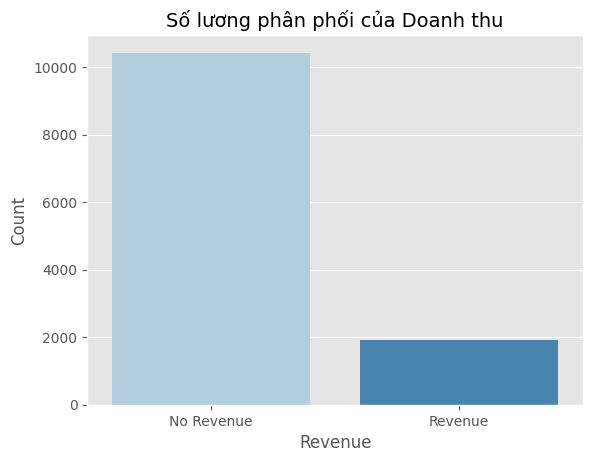

In [164]:
# Vẽ histogram của Doanh thu
sns.countplot(data=df, x='Revenue', palette='Blues')

# Định dạng và hiển thị đồ thị
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Số lương phân phối của Doanh thu', fontsize=14)
plt.xticks([0, 1], ['No Revenue', 'Revenue'], fontsize=10)
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh1.png')
plt.show()

In [165]:
# Danh sách các cột dữ liệu phân loại cần được mã hóa
categorical_columns = ['Weekend', 'Revenue']

# Duyệt qua từng cột trong danh sách categorical_columns
for col in categorical_columns:
    # Tạo đối tượng LabelEncoder
    encoder = LabelEncoder()

    # Mã hóa cột hiện tại
    df[col] = encoder.fit_transform(df[col])

    # In thông tin về cột hiện tại
    print('Cột:', col)
    print('Trước khi mã hóa:', encoder.classes_)
    print('Sau khi mã hóa:', encoder.transform(encoder.classes_))
    print('\n')


Cột: Weekend
Trước khi mã hóa: [False  True]
Sau khi mã hóa: [0 1]


Cột: Revenue
Trước khi mã hóa: [False  True]
Sau khi mã hóa: [0 1]




In [166]:
# Tạo bản đồ ánh xạ cho các tháng
mapping_month = {'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

# Áp dụng bản đồ ánh xạ cho cột 'Month'
df['Month'] = df['Month'].map(mapping_month)


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [168]:
# Đếm số lượng của mỗi hệ điều hành
count_operasystem = df['OperatingSystems'].value_counts()

# In ra số lượng của mỗi hệ điều hành
print(count_operasystem)


2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


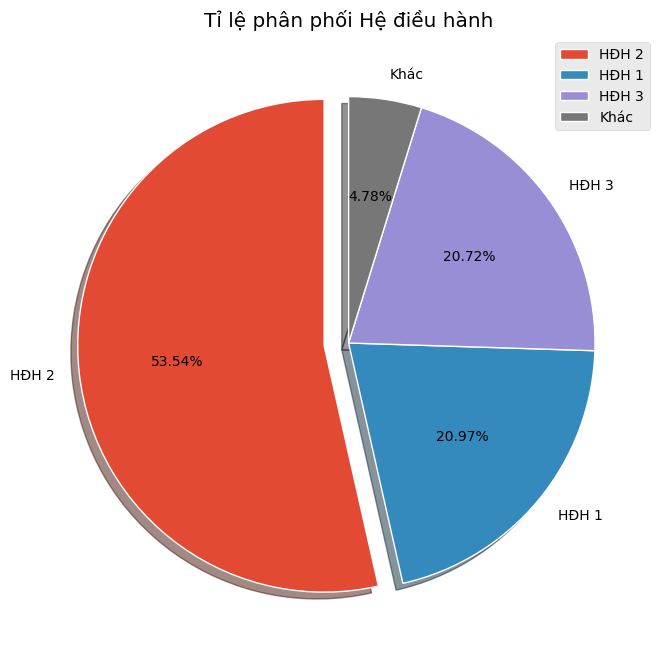

In [169]:
# Dữ liệu số lượng hệ điều hành
operating_systems = [6601, 2585, 2555, 589]

# Nhãn cho từng hệ điều hành
os_labels = ["HĐH 2", "HĐH 1", "HĐH 3", "Khác"]

# Tạo figure và axis
fig, ax = plt.subplots(figsize=(10, 8))

# Vẽ pie chart
wedges, text, autotexts = ax.pie(operating_systems, autopct='%.2f%%', labels=os_labels,
                                 explode=(0.1, 0, 0, 0), shadow=True, startangle=90,
                                 wedgeprops={"linewidth": 1, "edgecolor": "white"})

# Đặt tiêu đề và legend
plt.title('Tỉ lệ phân phối Hệ điều hành')
plt.legend()

plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh2.png')
# Hiển thị đồ thị
plt.show();


In [170]:
# Đếm số lượng xuất hiện của mỗi giá trị trong cột 'Browser'
browser_counts = df['Browser'].value_counts()
browser_counts

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

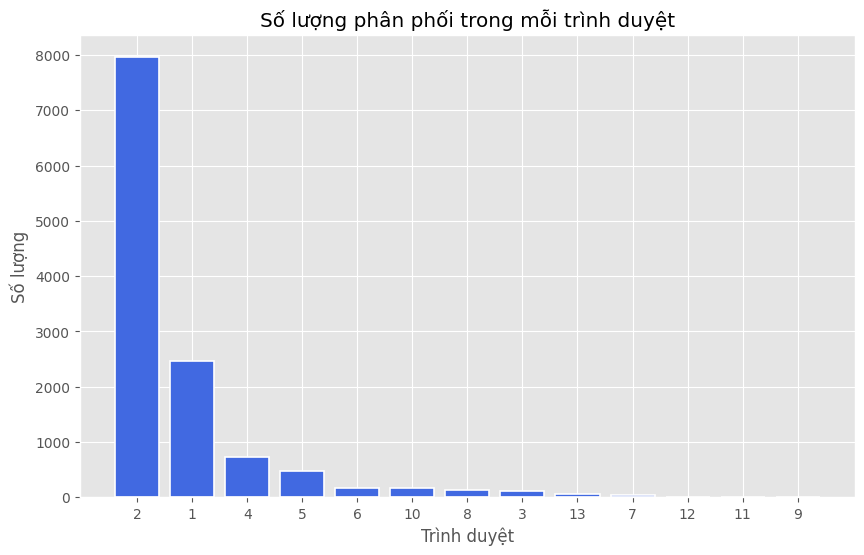

In [171]:
# Lấy giá trị và nhãn từ đối tượng đếm
browser_values = browser_counts.values
browser_labels = browser_counts.index.astype(str)

# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(browser_labels, browser_values, color='#4169E1', edgecolor='#FFFFFF', linewidth=1.2)

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Số lượng phân phối trong mỗi trình duyệt')
plt.xlabel('Trình duyệt')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh3.png')
plt.show();


In [172]:
# Đếm số lượng xuất hiện của mỗi giá trị trong cột 'Month'
month_counts = df['Month'].value_counts()
month_counts

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

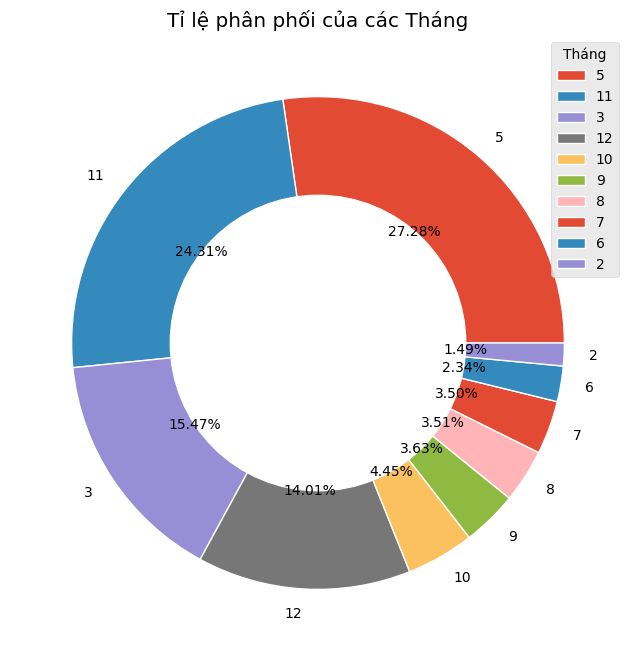

In [173]:
# Lấy các giá trị và nhãn từ Series
month_values = month_counts.values
month_labels = month_counts.index.astype(str)

# Tạo đồ thị
plt.figure(figsize=(8, 8))
plt.pie(month_values, labels=month_labels, autopct='%.2f%%',
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

# Tạo vòng trắng ở giữa
centre_circle = plt.Circle((0, 0), 0.6, color='white', edgecolor='black', linewidth=0.8)
p = plt.gcf()
p.gca().add_artist(centre_circle)
plt.axis('off')
plt.legend(title = 'Tháng',loc='upper right')

# Đặt tiêu đề
plt.title('Tỉ lệ phân phối của các Tháng')

# Hiển thị biểu đồ
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh4.png')
plt.show();

In [174]:
# Đếm số lượng xuất hiện của mỗi giá trị trong cột 'VisitorType'
visitor_counts = df['VisitorType'].value_counts()
visitor_counts

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

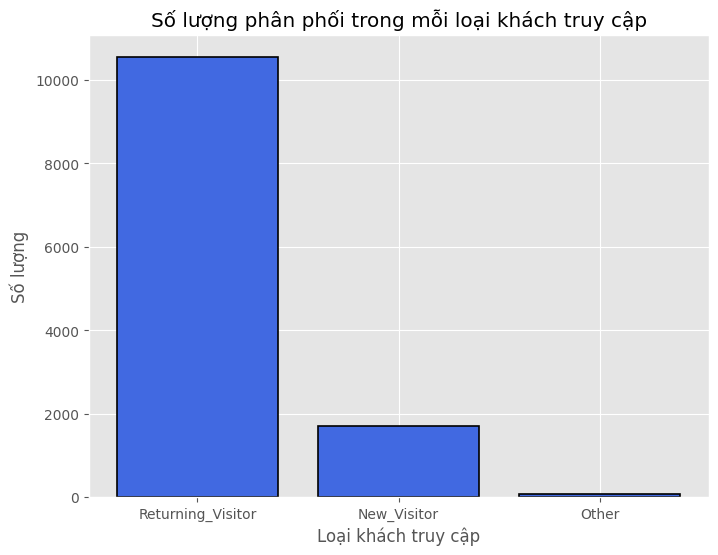

In [175]:
# Lấy các giá trị và nhãn từ Series
visitor_values = visitor_counts.values
visitor_labels = visitor_counts.index.astype(str)

# Tạo đồ thị cột
plt.figure(figsize=(8, 6))
plt.bar(visitor_labels, visitor_values, color='#4169E1', edgecolor='black', linewidth=1.2)

# Đặt tiêu đề và nhãn cho trục x và y
plt.title('Số lượng phân phối trong mỗi loại khách truy cập')
plt.xlabel('Loại khách truy cập')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh5.png')
plt.show();

In [176]:
# Đếm số lượng xuất hiện của mỗi giá trị trong cột 'TrafficType'
traffic_type_count = df['TrafficType'].value_counts()
traffic_type_count

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

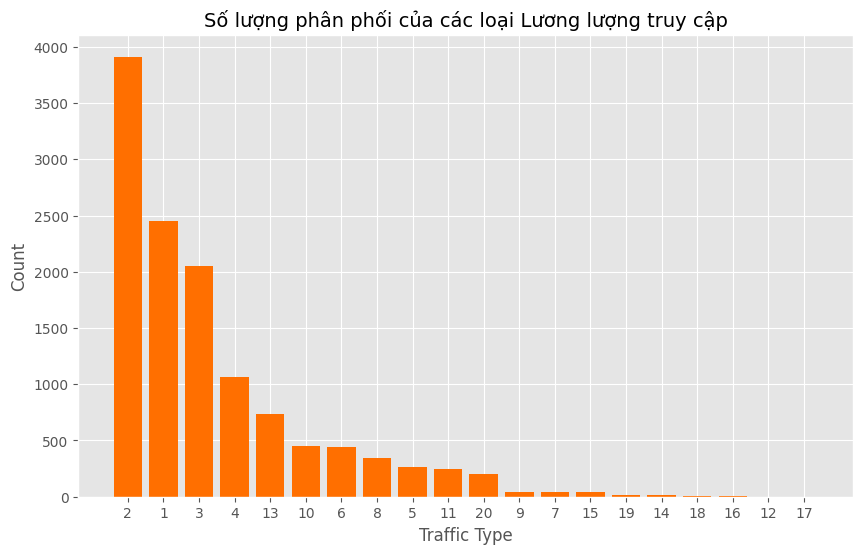

In [177]:
# Dữ liệu của cột TrafficType
traffic_type_values = traffic_type_count.values
traffic_type_labels = traffic_type_count.index.astype(str)

# Tạo đồ thị area
plt.figure(figsize=(10, 6))
plt.bar(traffic_type_labels, traffic_type_values, color='#FF6F00', linewidth=2)

# Đặt tên cho trục x và trục y
plt.xlabel('Traffic Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Đặt tiêu đề cho biểu đồ
plt.title('Số lượng phân phối của các loại Lương lượng truy cập', fontsize=14)

# Hiển thị biểu đồ
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh6.png')
plt.show();


In [178]:
# Đếm số lượng xuất hiện của mỗi giá trị trong cột 'Region'
region_count = df['Region'].value_counts()
region_count

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

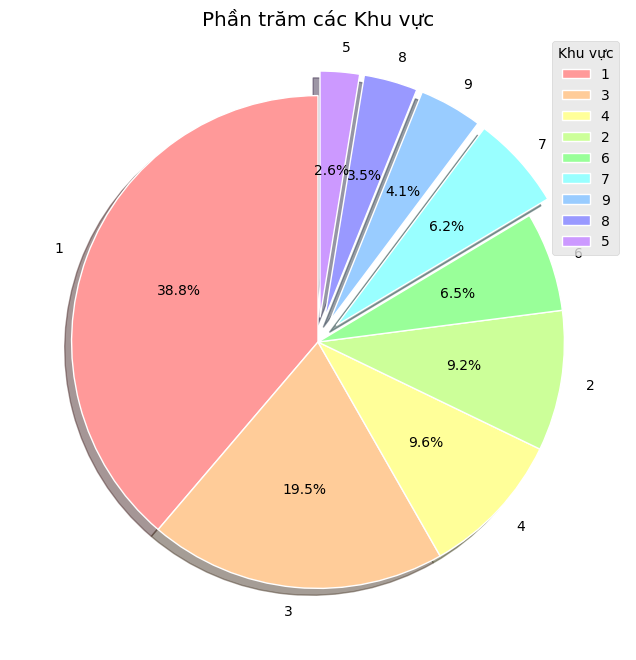

In [179]:
# Dữ liệu của cột Region
region_values = region_count.values
region_labels = region_count.index.astype(str)

# Màu sắc cho các phần tử trong biểu đồ
colors = ['#FF9999', '#FFCC99', '#FFFF99', '#CCFF99', '#99FF99', '#99FFFF', '#99CCFF', '#9999FF', '#CC99FF']

# Vẽ biểu đồ pie chart
fig,ax = plt.subplots(figsize = (10,8))
wedes, text, autotexts = ax.pie(region_values, labels=region_labels, autopct='%.1f%%', startangle=90, colors=colors,
                                wedgeprops={"linewidth": 1, "edgecolor": "white"}, shadow = True,
                                explode = (0,0,0,0,0,0.1,0.1,0.1,0.1))
# Đặt tiêu đề cho biểu đồ
plt.title('Phần trăm các Khu vực')
plt.legend(title = 'Khu vực')

# Hiển thị biểu đồ
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh7.png')
plt.show();

In [180]:
# Nhóm dữ liệu theo khu vực và tính trung bình doanh thu
region_groupby_revenue = df.groupby('Region')['Revenue'].mean()
region_groupby_revenue_df = pd.DataFrame({'Average Revenue': region_groupby_revenue}).sort_values(by='Average Revenue', ascending=False)

region_groupby_revenue_df

,Average Revenue
Region,
9,0.168297
2,0.165493
5,0.163522
1,0.161297
7,0.156373
4,0.148054
3,0.145235
6,0.139130
8,0.129032


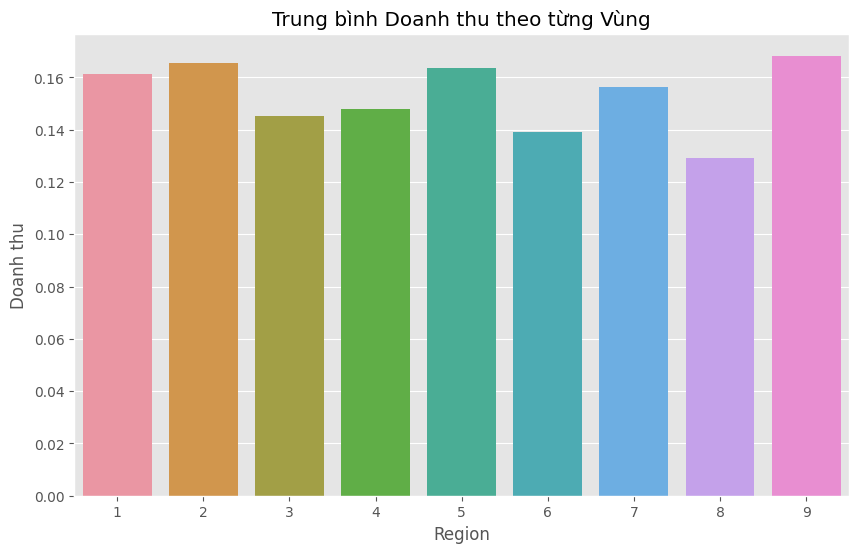

In [181]:
# Vẽ biểu đồ trung bình Doanh thu theo từng Vùng
plt.figure(figsize=(10, 6))
sns.barplot(data=region_groupby_revenue_df, x=region_groupby_revenue_df.index, y='Average Revenue')
plt.title('Trung bình Doanh thu theo từng Vùng')
plt.xlabel('Region')
plt.ylabel('Doanh thu')
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh8.png')
plt.show();

In [182]:
# Nhóm dữ liệu theo TrafficType và tính tổng Doanh thu
traffictype_groupby_revenue = df.groupby('TrafficType')['Revenue'].sum()
traffictype_groupby_revenue_df = pd.DataFrame({'Total Revenue': traffictype_groupby_revenue}).sort_values(by='Total Revenue', ascending=False)

traffictype_groupby_revenue_df

,Total Revenue
TrafficType,
2,847
1,262
3,180
4,165
8,95
10,90
5,56
6,53
20,50


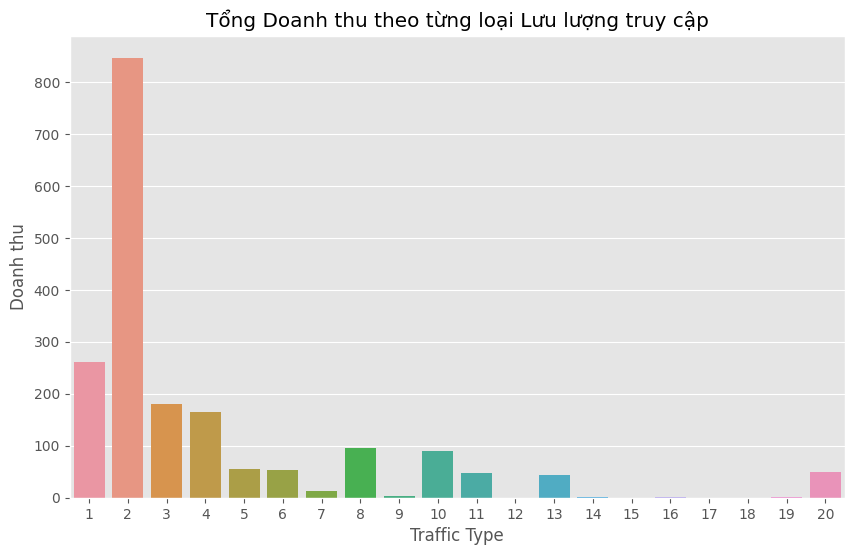

In [183]:
# Vẽ biểu đồ cột sử dụng Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=traffictype_groupby_revenue_df, x=traffictype_groupby_revenue_df.index, y='Total Revenue')
plt.title('Tổng Doanh thu theo từng loại Lưu lượng truy cập')
plt.xlabel('Traffic Type')
plt.ylabel('Doanh thu')
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh9.png')
plt.show();

In [184]:
# Tính trung bình Doanh thu theo từng ngày đặc biệt
specialday_groupby_revenue = df.groupby('SpecialDay')['Revenue'].mean()
specialday_groupby_revenue_df = pd.DataFrame({'Average Revenue': specialday_groupby_revenue}).sort_values(by='Average Revenue', ascending=False)

specialday_groupby_revenue_df

,Average Revenue
SpecialDay,
0.0,0.165268
0.6,0.082621
0.2,0.078652
1.0,0.064935
0.4,0.053498
0.8,0.033846


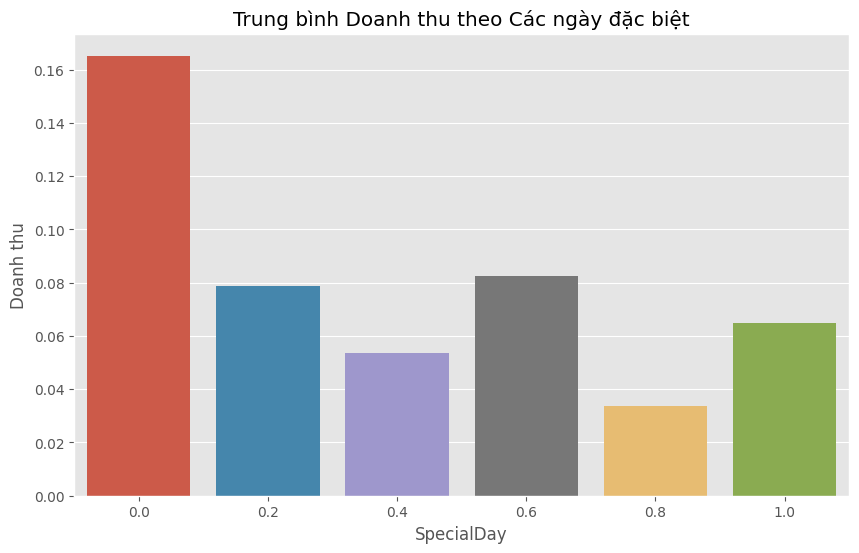

In [185]:
# Vẽ biểu đồ barplot thể hiện trung bình Doanh thu theo Các ngày đặc biệt
plt.figure(figsize=(10, 6))
sns.barplot(data=specialday_groupby_revenue_df, x=specialday_groupby_revenue_df.index, y='Average Revenue')
plt.title('Trung bình Doanh thu theo Các ngày đặc biệt')
plt.xlabel('SpecialDay')
plt.ylabel('Doanh thu')
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh10.png')
plt.show();

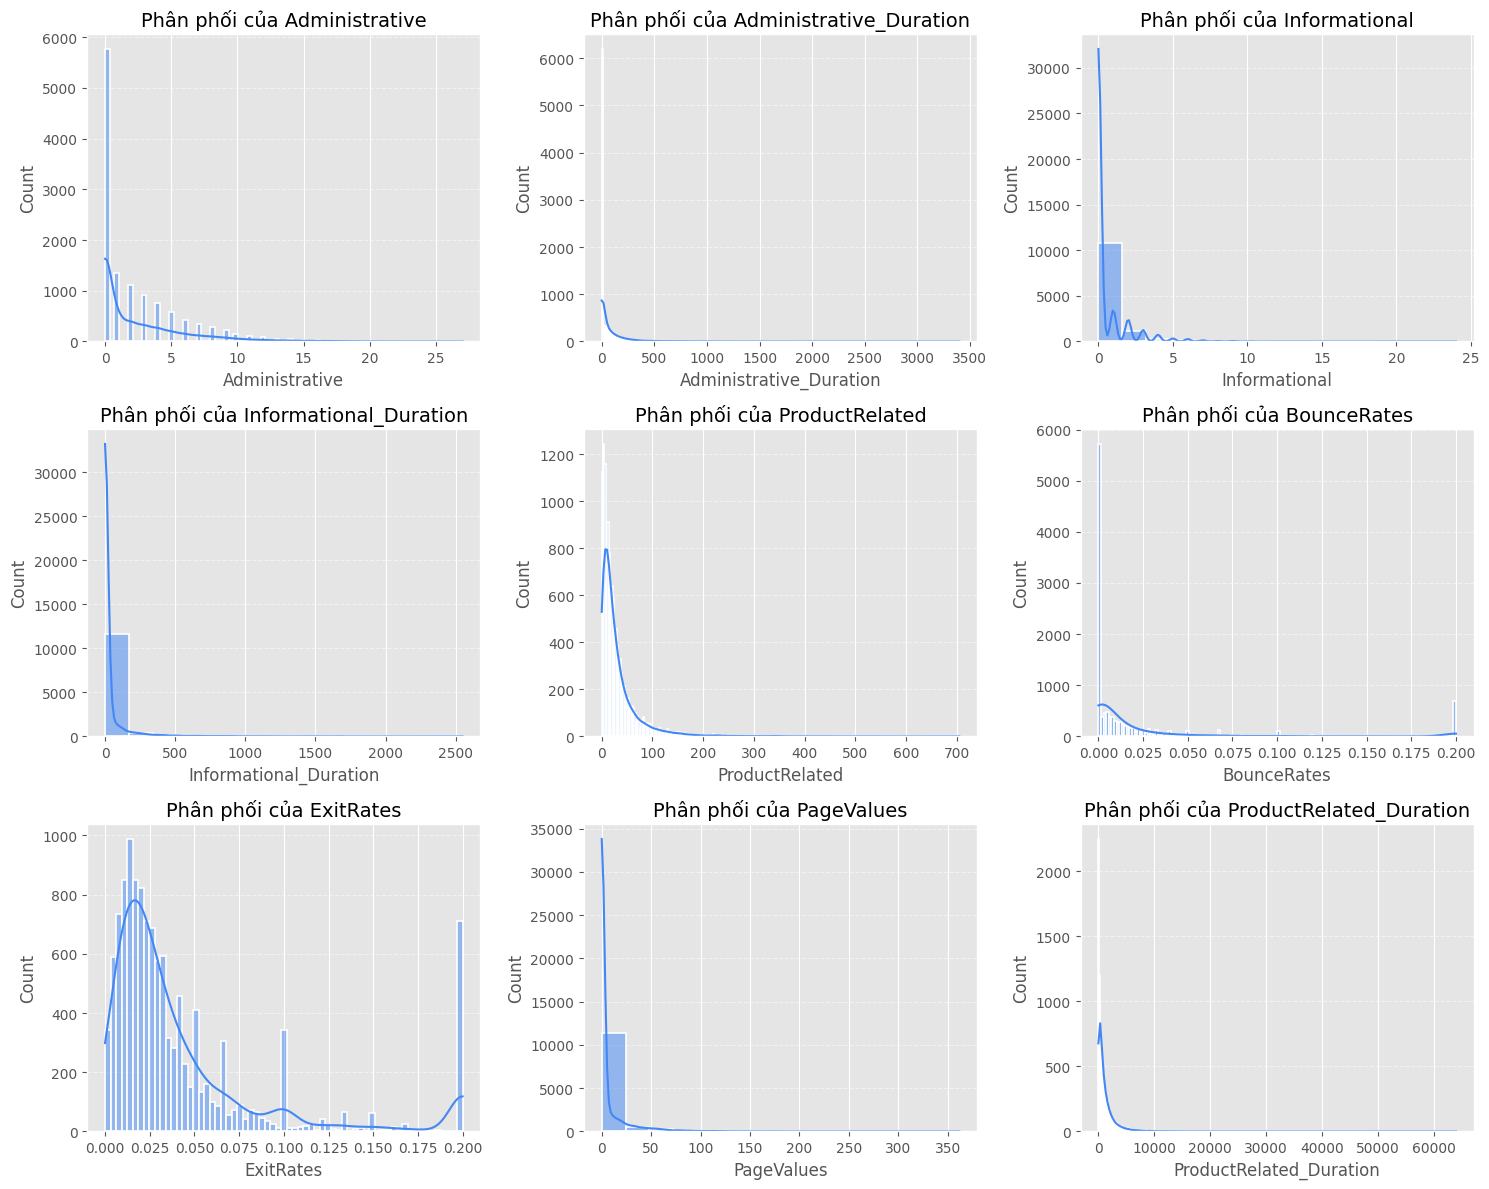

In [186]:
# Danh sách các biến có giá trị liên tục
continuous_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                   'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'ProductRelated_Duration']

# Tạo một lưới 3x3 để vẽ biểu đồ histogram
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Duyệt qua từng biến trong danh sách continuous_vars
for i, var in enumerate(continuous_vars):
    row = i // 3  # Vị trí dòng
    col = i % 3  # Vị trí cột
    ax = axes[row, col]  # Truy cập vào ô tương ứng trong lưới

    # Vẽ biểu đồ histogram và đường phân phối KDE
    sns.histplot(data=df, x=var, kde=True, ax=ax, color='#4287f5', edgecolor='white', linewidth=1.2)

    # Đặt tên trục x, trục y và tiêu đề cho biểu đồ
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Phân phối của {var}', fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Tăng độ rộng và độ cao của các ô trong lưới để tránh trùng lắp
plt.tight_layout()

# Hiển thị biểu đồ
plt.show();

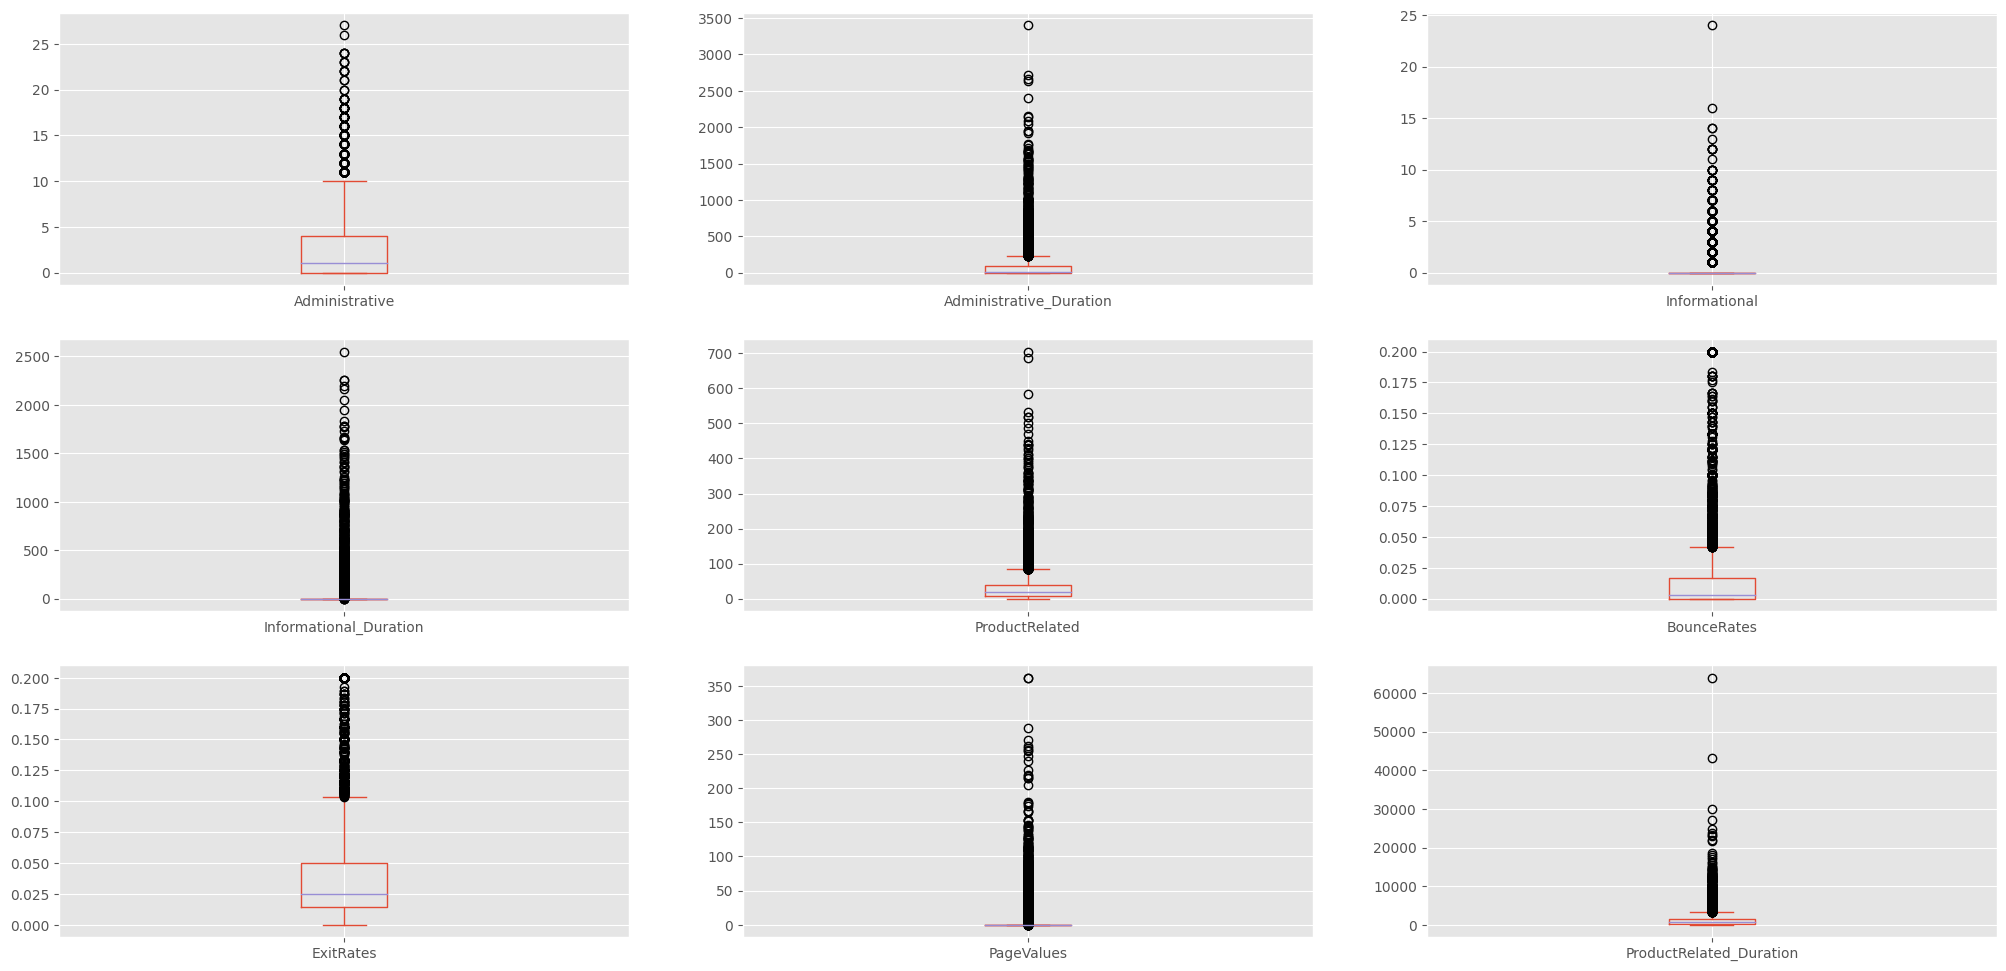

In [187]:
# Sử dụng phương thức plot của DataFrame để vẽ biểu đồ hộp cho các biến liên tục
df[continuous_vars].plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(25, 12))

# Hiển thị biểu đồ
plt.show();

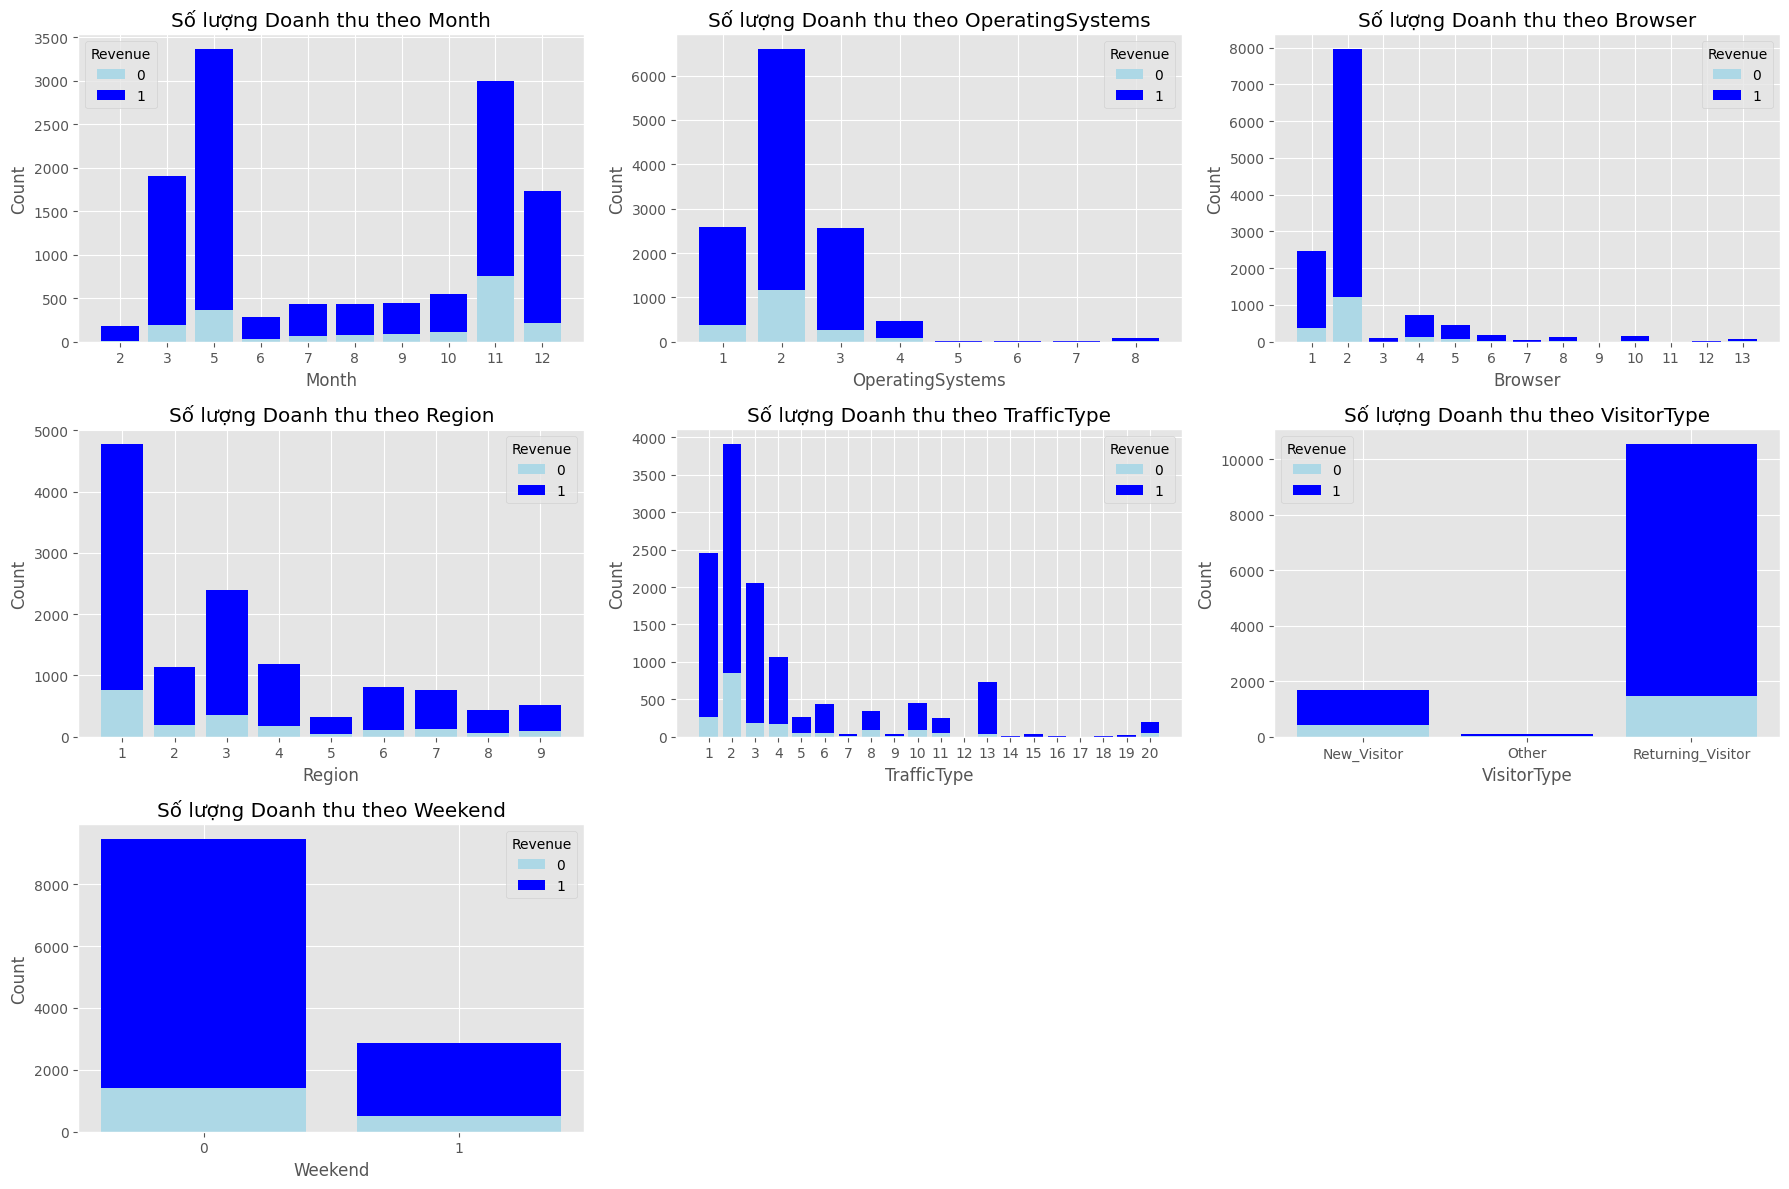

In [188]:
# Danh sách các biến phân loại
categorical_vars = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Biến mục tiêu
target_var = 'Revenue'

# Tạo một lưới 3x3 chứa các biểu đồ cột
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Duyệt qua danh sách các biến phân loại
for i, var in enumerate(categorical_vars):
    row = i // 3
    col = i % 3

    # Tính toán bảng tần số giữa biến phân loại và biến mục tiêu
    frequency_table = pd.crosstab(index=df[var], columns=df[target_var])

    # Lấy trục tương ứng trong lưới
    ax = axes[row, col]

    # Vẽ biểu đồ cột cho từng biến phân loại
    ax.bar(frequency_table.index.astype(str), frequency_table[1], label='0', color='lightblue')
    ax.bar(frequency_table.index.astype(str), frequency_table[0], bottom=frequency_table[1], label='1', color='blue')

    # Đặt tên trục x và y, tiêu đề cho từng biểu đồ
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_title(f'Số lượng Doanh thu theo {var}')

    # Hiển thị chú thích (legend) với tên "Revenue" và màu sắc tương ứng
    ax.legend(title='Revenue')

# Kiểm tra nếu số lượng biến phân loại ít hơn 9, xóa các trục không sử dụng
if len(categorical_vars) < 9:
    for i in range(len(categorical_vars), 9):
        row = i // 3
        col = i % 3
        plt.delaxes(axes[row, col])

# Cài đặt khoảng cách và hiển thị biểu đồ
plt.tight_layout()
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh11.png')
plt.show();

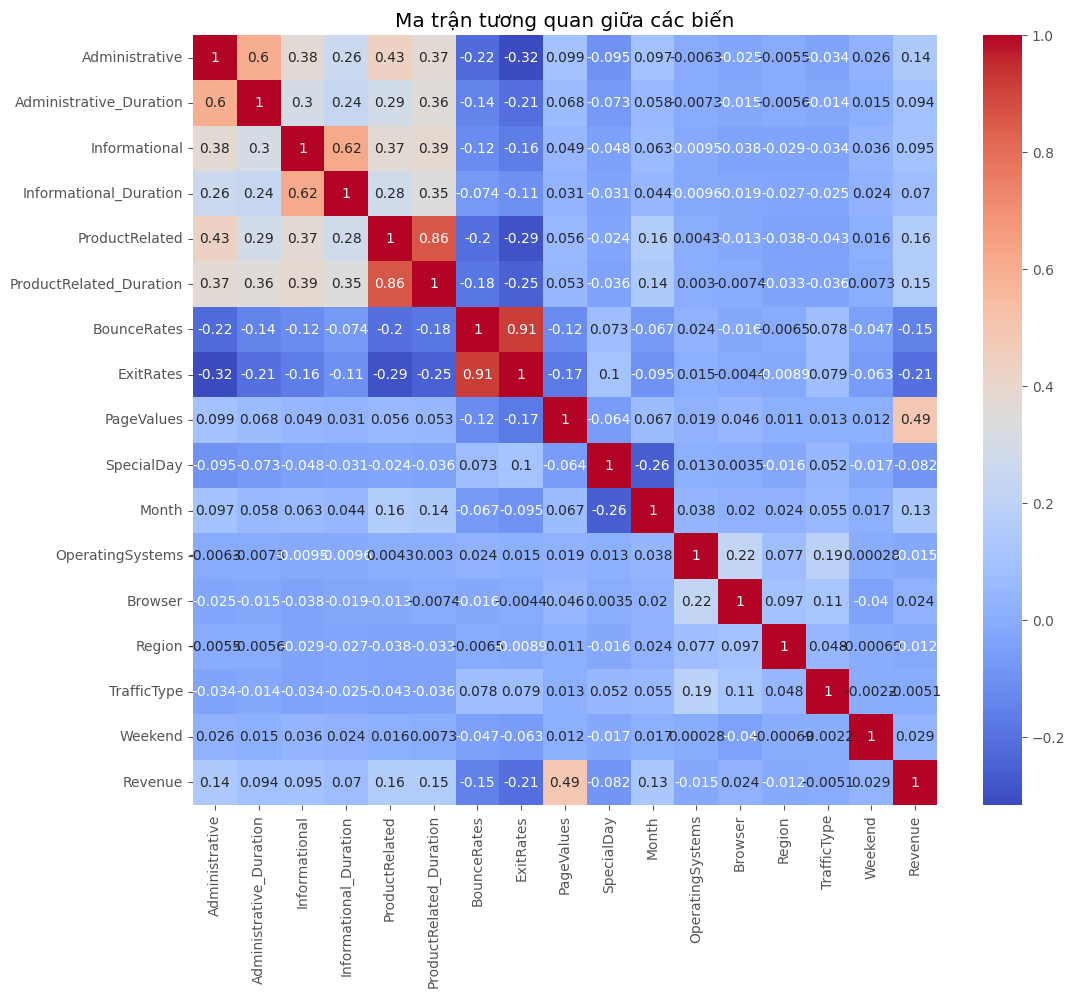

In [189]:
# Tính toán ma trận tương quan giữa các biến
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

# Vẽ biểu đồ heatmap cho ma trận tương quan
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Đặt tiêu đề cho biểu đồ
plt.title('Ma trận tương quan giữa các biến')

# Hiển thị biểu đồ
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/anh12.png')
plt.show();

# Tiền xử lý dữ liệu (Data Preprocessing)

In [190]:
# Tạo một bản sao của DataFrame df
df_copy = df.copy()

# Lấy danh sách các tên cột của df_copy
df_copy.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [191]:
print("Số lượng dòng dữ liệu trùng lặp:", df_copy.duplicated().sum())

Số lượng dòng dữ liệu trùng lặp: 125


In [192]:
# Kiểm tra và xóa bỏ các dữ liệu trùng lặp
df_copy.drop_duplicates(inplace=True)

# In thông tin về số lượng dòng sau khi xóa bỏ các dữ liệu trùng lặp
print("Số lượng dòng sau khi xóa bỏ các dữ liệu trùng lặp:", len(df_copy))

Số lượng dòng sau khi xóa bỏ các dữ liệu trùng lặp: 12205


In [193]:
# Sử dụng MinMaxScaler để chuẩn hóa các biến liên tục trong DataFrame df_copy
sc = MinMaxScaler()
df_copy[continuous_vars] = sc.fit_transform(df_copy[continuous_vars])

# In ra các giá trị chuẩn hóa của các biến liên tục
df_copy[continuous_vars]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,ProductRelated_Duration
0,0.000000,0.000000,0.0,0.0,0.001418,1.000000,1.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.0,0.002837,0.000000,0.500000,0.000000,0.001000
2,0.000000,0.000000,0.0,0.0,0.001418,1.000000,1.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.0,0.002837,0.250000,0.700000,0.000000,0.000042
4,0.000000,0.000000,0.0,0.0,0.014184,0.100000,0.250000,0.000000,0.009809
...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.035714,0.145153,0.033839,0.027883
12326,0.000000,0.000000,0.0,0.0,0.007092,0.000000,0.106667,0.000000,0.007280
12327,0.000000,0.000000,0.0,0.0,0.008511,0.416667,0.433333,0.000000,0.002880
12328,0.148148,0.022067,0.0,0.0,0.021277,0.000000,0.105263,0.000000,0.005408


In [194]:
# Sử dụng phương pháp One-Hot Encoding để mã hóa biến VisitorType trong DataFrame df_copy
visitortype_encode = pd.get_dummies(df_copy['VisitorType'])

# In ra DataFrame mã hóa của biến VisitorType
visitortype_encode

,New_Visitor,Other,Returning_Visitor
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
12325,0,0,1
12326,0,0,1
12327,0,0,1
12328,0,0,1


In [195]:
# Ghép DataFrame mã hóa visitortype_encode vào df_copy theo trục cột (axis=1)
df_copy = pd.concat([df_copy, visitortype_encode], axis=1)

# Xóa cột VisitorType từ df_copy
df_copy = df_copy.drop('VisitorType', axis=1)

# Hiển thị thông tin về DataFrame df_copy sau khi thực hiện ghép và xóa cột
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  float64
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  float64
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  float64
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [196]:
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,1,0,0,0,1


In [197]:
# Tạo biến X (Features) và y (Target) từ DataFrame df_copy
X = df_copy.drop('Revenue', axis=1)
y = df_copy['Revenue']

In [198]:
# In ra số lượng mẫu 'Revenue' trước khi sử dụng kỹ thuật Oversampling SMOTE
print("Số lượng mẫu trước oversampling:")
print(pd.Series(y).value_counts())

Số lượng mẫu trước oversampling:
0    10297
1     1908
Name: Revenue, dtype: int64


In [199]:
# Áp dụng kỹ thuật Oversampling SMOTE cho dữ liệu
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

In [200]:
# In ra số lượng mẫu 'Revenue' sau khi sử dụng kỹ thuật Oversampling SMOTE
print("Số lượng mẫu sau oversampling:")
print(pd.Series(y_resampled).value_counts())

Số lượng mẫu sau oversampling:
0    10297
1    10297
Name: Revenue, dtype: int64


In [201]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.4, random_state=42, stratify=y_resampled)

# In thông tin về số dòng, số cột của từng tập dữ liệu
print("Số dòng, số cột của X_train:", X_train.shape)
print("Số dòng, số cột của X_test:", X_test.shape)
print("Số dòng, số cột của y_train:", y_train.shape)
print("Số dòng, số cột của y_test:", y_test.shape)

Số dòng, số cột của X_train: (12356, 19)
Số dòng, số cột của X_test: (8238, 19)
Số dòng, số cột của y_train: (12356,)
Số dòng, số cột của y_test: (8238,)


# Dự đoán mô hình học máy ( Predict Machine Learning )

## Logistic Regression ( Hồi quy Logistic )

In [202]:
# Tạo một mô hình Logistic Regression mới
lr_model = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
lr_model.fit(X_train, y_train)


LogisticRegression()

In [203]:
# Sử dụng mô hình Logistic Regression để dự đoán nhãn của dữ liệu kiểm tra
lr_pred = lr_model.predict(X_test)

# In ra 20 dự đoán đầu tiên
print(lr_pred[0:20])

[0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1]


In [204]:
print(y_test[:20].values)

[0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1]


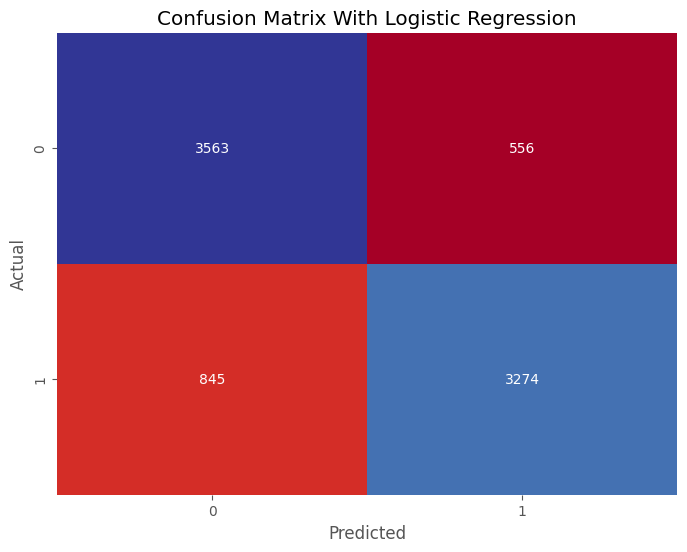

In [205]:
# Vẽ ma trận nhầm lẫn của mô hình Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='RdYlBu', fmt='d', cbar=False)
plt.title('Confusion Matrix With Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/cfmtL.png')
plt.show();

In [206]:
# Tính toán các giá trị đánh giá hiệu suất của mô hình Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [207]:
# In ra các giá trị đánh giá hiệu suất của mô hình Logistic Regression
print(f"Accuracy của mô hình Logistic: {lr_accuracy}\n")
print(classification_report(y_test, lr_pred))

Accuracy của mô hình Logistic: 0.8299344501092498

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4119
           1       0.85      0.79      0.82      4119

    accuracy                           0.83      8238
   macro avg       0.83      0.83      0.83      8238
weighted avg       0.83      0.83      0.83      8238



In [208]:
# Lưu mô hình Logistic Regression vào file pickle
with open('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/models/logisticregression.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

## Decision Tree ( Cây quyết định )

In [209]:
# Khởi tạo mô hình Decision Tree và huấn luyện trên tập huấn luyện
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [257]:
# Dự đoán nhãn cho tập dữ liệu kiểm tra bằng mô hình Decision Tree
dt_pred = dt_model.predict(X_test)

# Hiển thị 20 dự đoán đầu tiên
print(dt_pred[0:20])

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1]


In [211]:
print(y_test[:20].values)

[0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1]


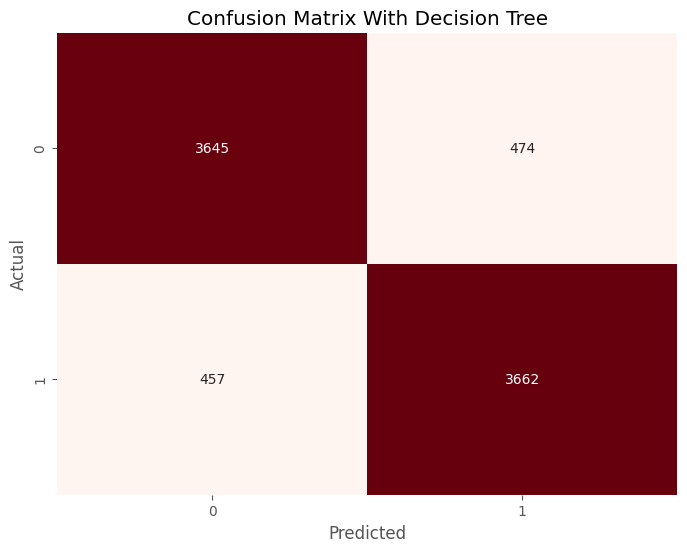

In [212]:
# Tạo một figure mới với kích thước là 8x6
plt.figure(figsize=(8, 6))

# Vẽ ma trận nhầm lẫn bằng heatmap, với confusion matrix là ma trận nhầm lẫn giữa các dự đoán và nhãn thực tế của mô hình Decision Tree
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, cmap='Reds', fmt='d', cbar=False)

# Đặt tiêu đề cho biểu đồ
plt.title('Confusion Matrix With Decision Tree')

# Đặt nhãn cho trục x
plt.xlabel('Predicted')

# Đặt nhãn cho trục y
plt.ylabel('Actual')

# Hiển thị biểu đồ
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/cfmtDt.png')
plt.show();


In [213]:
# Tính toán độ chính xác của mô hình
dt_accuracy = accuracy_score(y_test, dt_pred)

# Tính toán độ chính xác của mô hình
dt_precision = precision_score(y_test, dt_pred)

# Tính toán độ nhạy của mô hình
dt_recall = recall_score(y_test, dt_pred)

# Tính toán F1 score của mô hình
dt_f1 = f1_score(y_test, dt_pred)


In [214]:
# In ra giá trị accuracy của mô hình Decision Tree
print(f"Accuracy của mô hình Decision Tree: {dt_accuracy}\n")

# In ra classification report của mô hình Decision Tree
print(classification_report(y_test, dt_pred))

Accuracy của mô hình Decision Tree: 0.8869871327992231

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4119
           1       0.89      0.89      0.89      4119

    accuracy                           0.89      8238
   macro avg       0.89      0.89      0.89      8238
weighted avg       0.89      0.89      0.89      8238



In [215]:
# Lưu mô hình Decision Tree vào file
with open('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/models/decisiontree_regression_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

## Random Forest ( Rừng ngẫu nhiên )

In [245]:
# Tạo một mô hình Random Forest và huấn luyện trên tập huấn luyện
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [258]:
# Sử dụng mô hình Logistic Regression để dự đoán nhãn của dữ liệu kiểm tra
rf_pred = rf_model.predict(X_test)

# In ra 20 dự đoán đầu tiên
print(rf_pred[0:20])

[0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1]


In [247]:
print(y_test[:20].values)

[0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1]


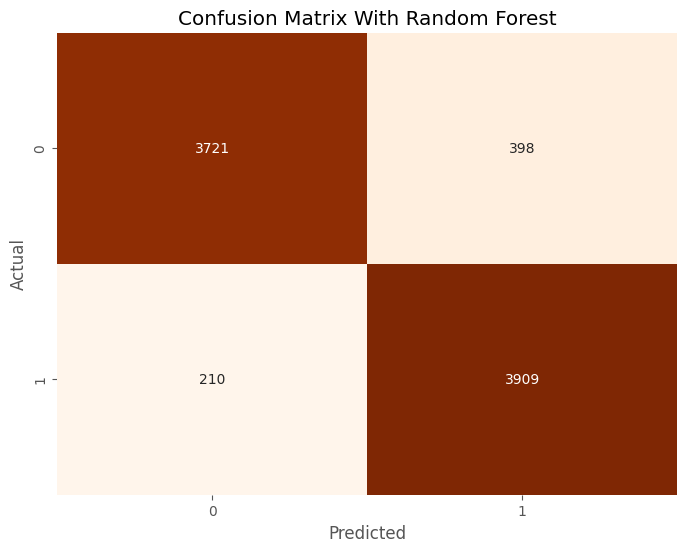

In [248]:
# Vẽ ma trận nhầm lẫn của mô hình Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Oranges', fmt='d', cbar=False)
plt.title('Confusion Matrix With Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/cfmtRf.png')
plt.show();

In [249]:
# Tính toán các giá trị đánh giá hiệu suất của mô hình Logistic Regression
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

In [250]:
# In ra các giá trị đánh giá hiệu suất của mô hình Logistic Regression
print(f"Accuracy của mô hình Random Forest: {rf_accuracy}\n")
print(classification_report(y_test, rf_pred))

Accuracy của mô hình Random Forest: 0.926195678562758

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4119
           1       0.91      0.95      0.93      4119

    accuracy                           0.93      8238
   macro avg       0.93      0.93      0.93      8238
weighted avg       0.93      0.93      0.93      8238



In [251]:
# Lưu mô hình Random Forest vào file pickle
with open('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/models/randomforest.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# So sánh hiệu suất của 3 mô hình :
*   Decision tree
*   Logistic Regression
*   Random Forest



In [252]:
# Tạo DataFrame để so sánh các giá trị đánh giá hiệu suất của các mô hình
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision],
    'Recall': [lr_recall, dt_recall, rf_recall],
    'F1-score': [lr_f1, dt_f1, rf_f1]
}

df_comparison = pd.DataFrame(data)
df_comparison.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy,Precision,Recall,F1-score
2,Random Forest,0.926196,0.907592,0.949017,0.927842
1,Decision Tree,0.886987,0.885397,0.889051,0.887220
0,Logistic Regression,0.829934,0.854830,0.794853,0.823751


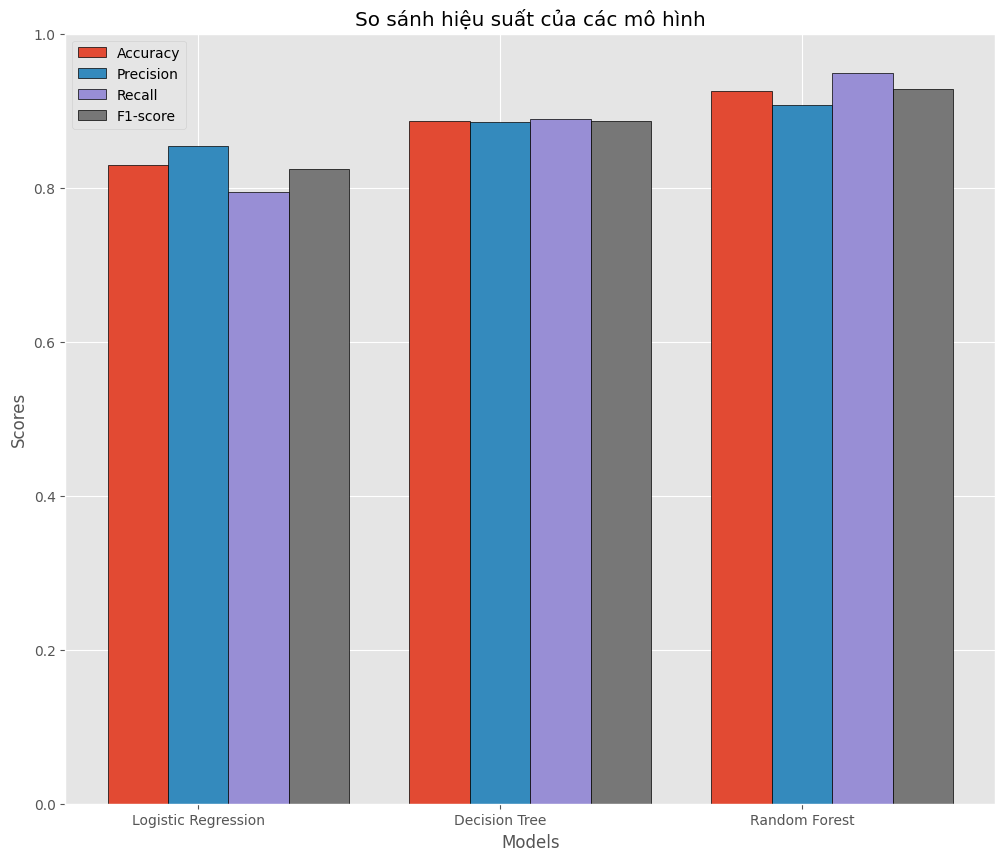

In [253]:
# Vẽ biểu đồ cột so sánh giữa các giá trị đánh giá hiệu suất của các mô hình
x = np.arange(len(data['Model']))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 10))
ax.bar(x - width, data['Accuracy'], width, label='Accuracy', edgecolor='black' )
ax.bar(x, data['Precision'], width, label='Precision', edgecolor='black')
ax.bar(x + width, data['Recall'], width, label='Recall', edgecolor='black')
ax.bar(x + 2 * width, data['F1-score'], width, label='F1-score', edgecolor='black')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('So sánh hiệu suất của các mô hình')
ax.set_xticks(x)
ax.set_xticklabels(data['Model'])
ax.legend()
ax.set_ylim([0, 1])

plt.savefig('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/comparemodel.png')
plt.show();

# Cuối cùng : Thực hiện dự đoán với mô hình Random Forest

In [254]:
# Đọc dữ liệu đầu vào từ tệp CSV và hiển thị nó trong một DataFrame
user_input = pd.read_csv('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/data/user_input.csv')
user_input

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,New_Visitor,Other,Returning_Visitor
0,0,0,0,0.000000,0.00,0.0000,0.200000,0.500000,20.000000,0.0,4,2,0,5,1,0,1,0,0
1,0,1,0,0.000000,1.00,159.3333,0.007058,0.030357,7.335340,0.2,8,1,1,9,2,1,0,1,0
2,3,2,0,0.000000,3.00,286.2222,0.150000,0.027273,0.000000,0.4,11,4,3,8,14,0,1,0,1
3,0,0,0,0.000000,5.00,399.3232,0.555550,0.028167,36.645654,0.8,3,8,5,2,1,1,0,0,1
4,2,2,0,16.444400,1.00,3434.2222,0.050000,0.200000,0.000000,0.4,10,1,8,3,2,1,1,0,0
5,1,1,4,0.000000,20.00,120.0000,0.050000,0.150000,0.000000,0.0,5,9,9,7,10,1,0,0,1
6,7,1,0,1.000000,32.00,164.0000,0.000850,0.026579,0.000000,0.4,4,2,4,4,15,0,1,1,1
7,4,0,0,182.000000,18.00,987.0000,0.007500,0.026667,0.000000,0.6,12,6,10,6,13,0,1,0,1
8,1,0,6,16.000000,10.00,370.0000,0.200000,0.049931,0.000000,0.0,2,3,13,8,6,0,1,1,1
9,10,2,0,29.000000,5.00,759.0000,0.100000,0.200000,5.543534,0.8,11,7,12,1,20,1,0,1,0


In [255]:
# Tải mô hình Random Forest và sử dụng nó để dự đoán kết quả cho dữ liệu đầu vào của người dùng
with open('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/models/randomforest.pkl','rb') as file:
    loaded_model = pickle.load(file)

# Thực hiện dự đoán dữ liệu user_input
prediction = loaded_model.predict(user_input)
print('Kết quả dự đoán khách hàng với tập dữ liệu user_input:',prediction )

Kết quả dự đoán khách hàng với tập dữ liệu user_input: [1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0]


In [256]:
# Tạo DataFrame từ kết quả dự đoán
result_df = pd.DataFrame({'Prediction': prediction})

# Lưu DataFrame vào file CSV
result_df.to_csv('/drive/My Drive/CongNgheKHDL/PredictingOnlineShopperIntention/data/prediction_user_input_results.csv', index=False)